In [24]:
import matplotlib.pyplot as plt

from models import TransformerModelLooped
from curriculum import CurriculumSimple
from train import train_without_config, validate_model

n_dims = 10

In [22]:
model_loop_b5 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b5 = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [1000, 5, 0])

metrics_l1_b5_d10 = train_without_config(
    model_loop_b5, cirriculum_b5, n_loop_window=5,model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="linear_regression")

number of parameters: 0.79M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 10.048377990722656:   6%|▋         | 942/15000 [01:14<18:28, 12.68it/s]


KeyboardInterrupt: 

In [18]:
model_loop_b10 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b10 = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [1000, 10, 0])

metrics_l1_b10_d10 = train_without_config(
    model_loop_b10, cirriculum_b10, n_loop_window=5, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="linear_regression")

number of parameters: 0.79M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 3.034191131591797: 100%|██████████| 15000/15000 [29:44<00:00,  8.41it/s] 


In [33]:
model_loop_b30 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b30 = CurriculumSimple(n_dims, 31, 30, [5000, n_dims, 0], [5000, 31, 0], [1000, 30, 0])

metrics_l1_b30_d10 = train_without_config(
    model_loop_b30, cirriculum_b30, n_loop_window=5, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="noisy_linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 9.36624526977539:   0%|          | 37/15000 [00:31<3:34:40,  1.16it/s]  


KeyboardInterrupt: 

In [30]:
model_loop_b10_b20 = TransformerModelLooped(
    n_dims=n_dims,
    n_positions=101,
    n_embd=128,
    n_layer=1,
    n_head=4,
    pred_type="regression",
).cuda()

cirriculum_b10_b20 = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [1500, 20, 0])

metrics_l1_b10_b20_d10 = train_without_config(
    model_loop_b10_b20, cirriculum_b10_b20, n_loop_window=5, model_n_dims=n_dims,
    log_every_steps=10, train_steps=15000, family="gpt2_loop",
    do_wandb_log=False, seed=None, task_name="linear_regression")

number of parameters: 0.20M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 3.2983736991882324: 100%|██████████| 15000/15000 [11:05<00:00, 22.53it/s]


In [15]:
def calculate_by_loop(model):
    val_by_loop = []
    loop_steps = []
    for i in range(1, 60):
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=i, model_n_dims=10, n_points=31, family="gpt2_loop", task_name="linear_regression")
        val_by_loop.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, val_by_loop

steps_b5, values_b5 = calculate_by_loop(model_loop_b5)

In [19]:
steps_b10, values_b10 = calculate_by_loop(model_loop_b10)

In [26]:
steps_b30, values_b30 = calculate_by_loop(model_loop_b30)

In [31]:
steps_b10_b20, values_b10_b20 = calculate_by_loop(model_loop_b10_b20)

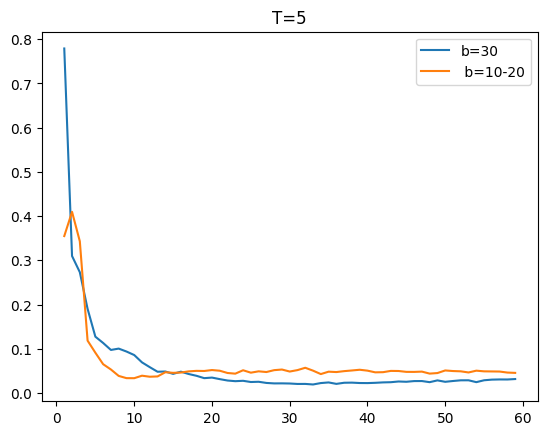

In [32]:
plt.plot(steps_b30, values_b30 )
plt.plot(steps_b10_b20, values_b10_b20 )
plt.title("T=5")
plt.legend(["b=30", " b=10-20"])

In [29]:
import numpy as np
np.argmin(np.array(values_b30))

0.01917288824915886

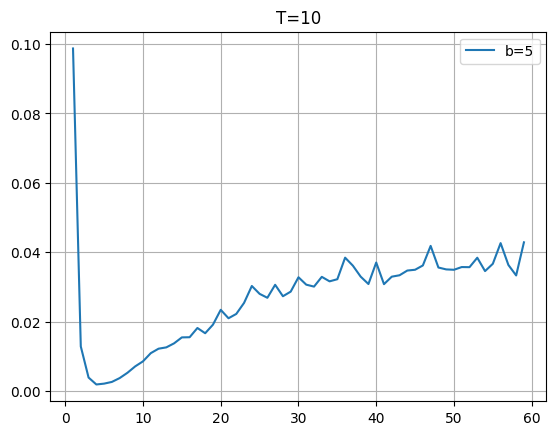

In [12]:
plt.plot(steps_b5, values_b5)
plt.grid()
plt.title("T=10")
plt.legend(["b=5"])
#plt.savefig('../images/check_for_scheduling_convergence_properties_noisy_linear_regression.png')